# Сборный проект. Анализ и прогноз продаж по играм.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Датафрейм имеет следующую структуру:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг   компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016г. могут быть неполными. 



## План работы над проектом:
1. Просмотреть таблицу и выявить аномалии и пропуски.
2. Провести предобработку таблицы: названия колонок, заполнение пропусков, удаление дубликатов и т.д.
3. Провести анализ данных и подготовить актуальные данные.
4. Составить портреты пользователей для купных регионов продаж.
5. Выполнить проверку гипотез.
6. Оформить проект и сделать выводы по каждому шагу.


# Шаг 1. Ознакомление с данными.

Импортируем библиотеки, читаем данные:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
import pandas as pd
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрев на типы данных и шапку таблицы посмотрим какими значениями заполнен каждый столбец.

In [4]:
def columns_uniq(df):
    for column in df.columns:
        print('Уникальные значения столбца', column)
        print(df[column].unique())       

In [5]:
columns_uniq(data)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 

Посмотрим на пропуски

In [6]:
data.isna().mean().sort_values(ascending=False)

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


Метод не очень наглядный в этом случае, из инфо по датафрейму вначале были видны единичные пропуски. Можно не в процентах глянуть а штуках:

In [8]:
pd.DataFrame(round(data.isna().mean()*16715,)).style.background_gradient('coolwarm')

,0
Name,2.000000
Platform,0.000000
Year_of_Release,269.000000
Genre,2.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,8578.000000
User_Score,6701.000000


Смотрим на каждую из 6-ти колонок с пропусками:

In [9]:
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data[data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Ещё заинтересовало значение '0' в колонке User_Score потому что оно есть, посмотрим сколько 0 поставили пользователи:

In [15]:
data[data['User_Score'] == '0']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


My Little Pony: Pinkie Pie's Part и 0 по оценкам пользователей, как же ты продалась на 0,72 млн копий? Описывается как ошибка, когда пользователи оставляют оценки о продукте по своей воле и это немного нарушает принцип неопределенности, потому что мы смотрим отзывы только тех людей, которые захотели их оставить. Очередной повод задуматься над пропусками в 'User_Score', думаю про замену на заглушку, про удаление думаю всё меньше и меньше.

## Вывод по шагу 1

Типы переменных:

* Категориальный: Name, Platform, Genre, Rating.

* Количественный: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

Столбец User_Score отнесен к количественной переменной. "to be defined" - это отсутсвие оценки на момент выгрузки дата фрейма.

Данные имеют несколько аномалий:

1. Пропуски по столцам Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
2. Аномалия tbd. Расшифровывается с ангилийского "to be defined". Это нормальное явление для компьютерных игр. Компьютерная игра должна пройте через определенное количество игроков или экспертов-геймеров, чтобы они дали оценку игре.
3. Тип столбца Year_of_Release. Год - целое число.
4. Дубликаты по имени, платформе и году выпуска. Возможно эту игру вносили несколько раз, давая информацию о разных рынках продажи.

Данные требуют предобработки.

Случайный тип аномалии:

* Пропуски в столбцах Name и Genre. Это строки 659 и 14244. По году и платформе видно. Что это одна и также игра, только в одной строке храниться данные о продажах в Европе и Америке, а во второй - только по Японии.

* Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей или издателей игр.
Неслучайный тип аномалии

* Пропуски в столбцах Critic_Score, User_Score и Rating. Оценка игр походит не быстро, а может даже вообще не пройти, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка.


# Шаг 2. Подготовка данных. 

### Приведём названия столбцов к нижнему регистру:

In [16]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Посмотрим на типы данных по колонкам:

critic_score, year_of_release - это целые числа, поменяем тип на integer, после обработки пропусков. 
В user_score не числовой тип данных, делая выше .unique() заметили значения в колонке - 'tbd' to be determined в faq метакритика говорит о том что эту метку ставят когда оценка не определена по каким-то причинам (мало оценок от пользователей, мало времени прошло с релиза) и подлежит уточнению. Для нас это NaN, меняем:

In [18]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [19]:
import numpy as np
data['user_score'] = data['user_score'].replace('tbd',np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков
Есть возможность восстановить часть пропусков в year_of_release для игр жанра спорт, например NHL 2015 вышел в 2014

Рейтинг игр часто бывает одинаковым у игр одного жанра, но это не всегда так, заменим на "заглушку"

Невозможно восстановить пропуски в critic_score и user_score. Это оценки и менять их медианой или средним нельзя, это исказит выводы.

Также удалим строки с пропущенными названиями игр.

In [21]:
year_of_release_nan = data[data['year_of_release'].isna()]
year_of_release_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
def fill_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre == 'Sports':
        year -=1
        if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

year_of_release_nan_filled = year_of_release_nan.apply(fill_year, axis=1)
year_of_release_nan_filled

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,2007.0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
year_of_release_nan_filled[year_of_release_nan_filled['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**По такой логике смогли заполнить 42 значения у игр жанра "спорт", применим функцию к основному датафрейму (спойлер: применим после удаления строк с проусками в названии), остальные пропуски в годе выпуска заполнить не получится, посмотрим сколько их всего осталось и можно ли будет удалить их:**

In [24]:
data.drop([659, 14244],inplace=True) #659,14244 - строки с пропусками в name
#df= df.dropna(subset=['name', 'genre'])

In [25]:
data_1 = data.apply(fill_year, axis=1)
data['year_of_release'].isna().sum()

269

269 значений, думаю, удалить, это очень малый процент данных

In [26]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


**Рейтинг заменим на заглушку:**

In [27]:
data['rating'] = data['rating'].fillna('No_Rat')

In [28]:
data['rating'].value_counts()

No_Rat    6676
E         3921
T         2905
M         1536
E10+      1393
EC           8
K-A          3
AO           1
RP           1
Name: rating, dtype: int64

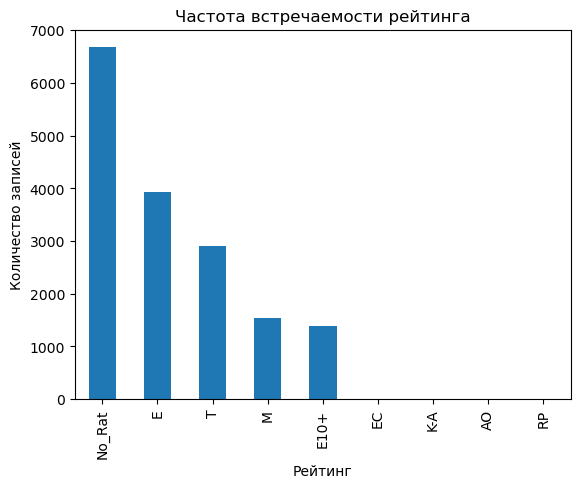

In [29]:
data['rating'].value_counts().plot(kind='bar',
                                   xlabel='Рейтинг', ylabel='Количество записей',
                                   title='Частота встречаемости рейтинга');

Видно что почти треть значений заменена на заглушку, эти данные потерять мы не можем, есть 14 записей которые почти не встречаются и их можно было бы удалить, но я ниже в проекте, когда определял портреты пользователей писал функцию которая добавляла новую колонку с рейтингами по годам и рейтинг К-А, из вики, это рейтинг E. (Это замена редких значений на более распространенные). Подниму функцию сюда. Остаются по одной записи рейтинг 18+ и РП. RP - это значит рейтинг не поставили или ожидается (так понимаю это аналош 'tbd'). Удалю их:

In [30]:
data = data[data['rating'] != 'AO']
data = data[data['rating'] != 'RP']

In [31]:
def fill_rating(row):
    rat = row['rating']
    if rat == 'K-A' or rat == 'E' or rat=='EC':
        return 'Для всех'
    elif rat == 'M':
        return '17+'
    elif rat == 'E10+':
        return '10+'
    elif rat == 'T':
        return '13+'
    elif rat == 'No_Rat':
        return 'Нет оценки'
    else:
        return rat
data['rating_h'] = data.apply(fill_rating, axis=1)

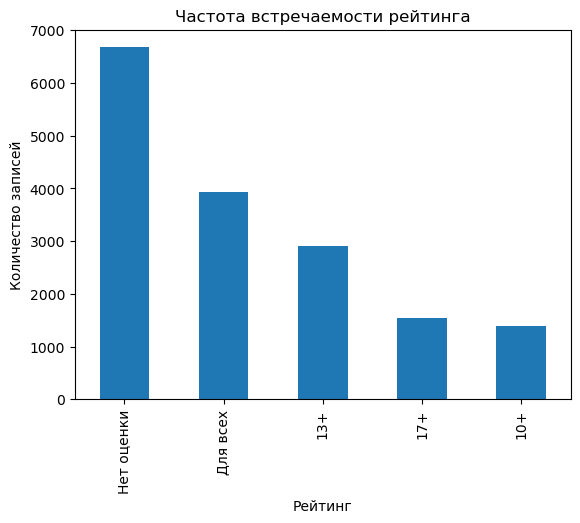

In [32]:
data['rating_h'].value_counts().plot(kind='bar',
                                   xlabel='Рейтинг', ylabel='Количество записей',
                                   title='Частота встречаемости рейтинга');

**user_score и critic_score можно также поменять на индикатор, например -1:**

In [33]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [34]:
data.isna().mean().sort_values(ascending=False)

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
rating_h           0.0
dtype: float64

In [35]:
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'], downcast='integer')

In [36]:
data.drop_duplicates() #Удалим дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_h
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,Для всех
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,No_Rat,Нет оценки
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,Для всех
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,No_Rat,Нет оценки
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,No_Rat,Нет оценки
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,No_Rat,Нет оценки


In [37]:
data.duplicated().sum()

0

## Создадим столбец суммарные продажи по миру

In [38]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data
#data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_h,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,No_Rat,Нет оценки,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,No_Rat,Нет оценки,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,No_Rat,Нет оценки,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,No_Rat,Нет оценки,0.01


## Вывод по шагу 2

Подготовили данные к анализу

1. Название столбцов было приведено к нижнему регистру
2. Восстановлены пропуски в строках.
3. Удалены строки без нужных данных.
4. Добавлен столбец суммарных продаж.

# Шаг 3. Анализ данных

Пойдем по списку:
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [39]:
year_of_release_pivot = data.groupby('year_of_release')['name'].agg('count') #считаем строки, группируя по годам 
year_of_release_pivot

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1135
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

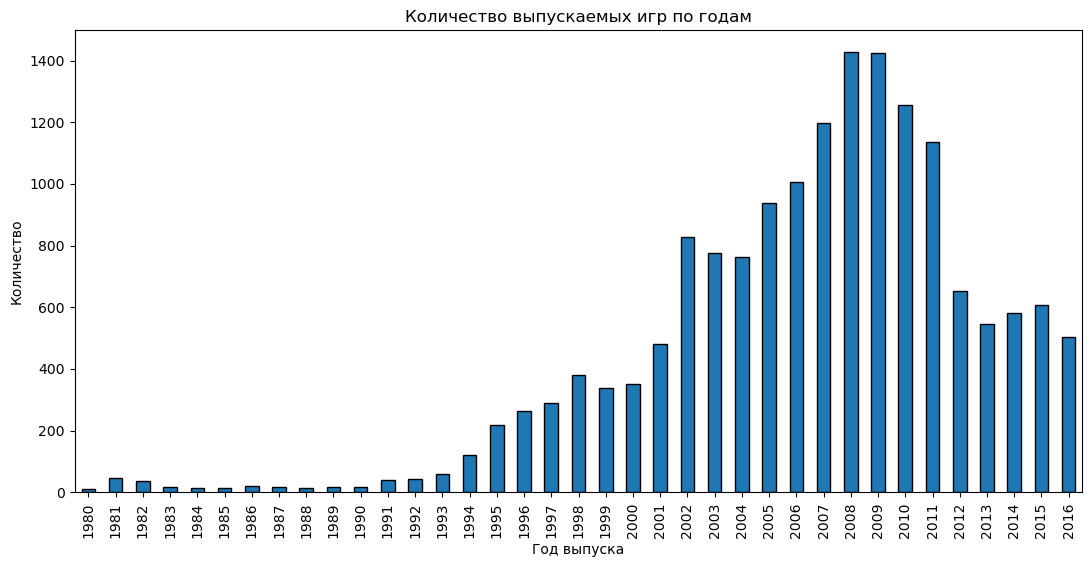

In [40]:
year_of_release_pivot.plot(kind='bar', y='name', figsize = (13,6), ec='black',
                           title='Количество выпускаемых игр по годам',
                           xlabel='Год выпуска', ylabel = 'Количество');

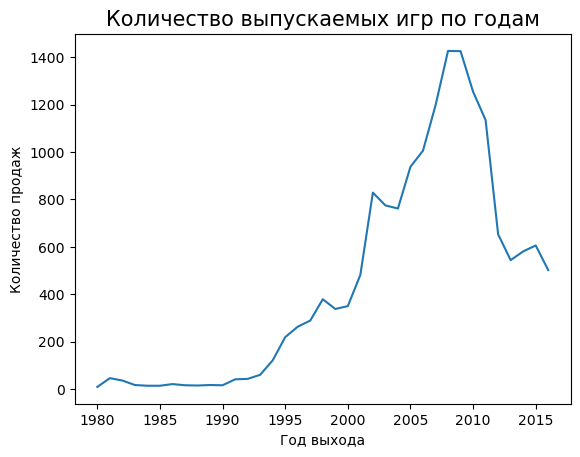

In [41]:
sns.lineplot(data=year_of_release_pivot)
plt.title('Количество выпускаемых игр по годам', fontsize=15)
plt.xlabel("Год выхода")
plt.ylabel("Количество продаж")
plt.show()

### Ответ на 1 вопрос.

*Данные по всем периодам не важны.*

С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.

В 2002 году видно, что выпустилось много игр. Это значит в период с 1997 по 2002 появились игровые движки для создания реалистичных игр и новые средства программирования.

Пик в 2009 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков, некоторые из которых бесплатны к использованию на сегодняшний день.

Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом, резким скачком в мобильном гейминге. И в целом игры стали больше, длиннее, объёмнее и сложнее в производстве. 

In [42]:
platform_pivot = data.groupby('platform')['total_sales'].agg('sum')
platform_pivot = platform_pivot.sort_values()
platform_pivot

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
XB       249.61
NES      251.05
GB       254.43
PC       255.72
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

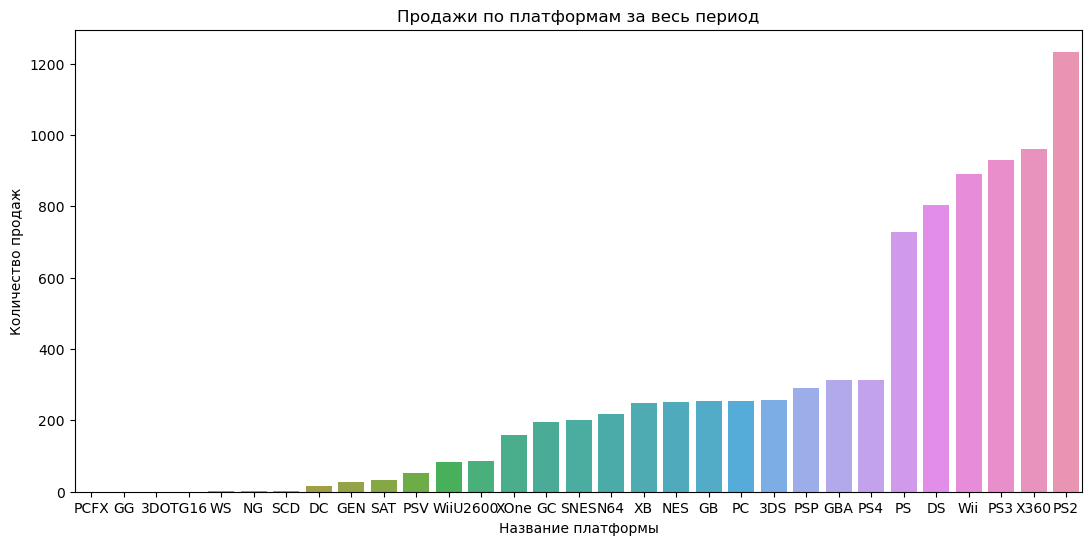

In [43]:
plt.figure(figsize=(13,6))
sns.barplot(x=platform_pivot.index,y=platform_pivot)
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Видим 6 самых популярных платформ.

In [44]:
platform_pivot = platform_pivot.sort_values(ascending=False)
top_platform_pivot = list(platform_pivot.index[:6])
top_platform_pivot

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Для исследования динамик продаж по годам, посмотрим разными способами визуализации

In [45]:
#def sale_platform(pl_name,df):
#    print(pl_name)
#    pl = data[data['platform'] == pl_name]
#    t = pd.pivot_table(pl, index=['year_of_release'], values='total_sales', aggfunc='sum')
#    print(t)
#    print()

In [46]:
def sale_platform(pl_name,df):
    print(pl_name)
    pl = data[data['platform'] == pl_name]
    t = pd.pivot_table(pl, index=['year_of_release'], values='total_sales', aggfunc='sum')
    display(t)
    display()

In [47]:
for i in top_platform_pivot:
    sale_platform(i,data)

PS2


,total_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


X360


,total_sales
year_of_release,
2005,8.25
2006,51.62
2007,95.41
2008,135.26
2009,120.29
2010,170.03
2011,143.84
2012,99.74
2013,88.58


PS3


,total_sales
year_of_release,
2006,20.96
2007,73.19
2008,118.52
2009,130.93
2010,142.17
2011,156.78
2012,107.36
2013,113.25
2014,47.76


Wii


,total_sales
year_of_release,
2006,137.15
2007,152.77
2008,171.32
2009,206.97
2010,127.95
2011,59.65
2012,21.71
2013,8.59
2014,3.75


DS


,total_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


PS


,total_sales
year_of_release,
1994,6.03
1995,35.96
1996,94.70
1997,136.17
1998,169.49
1999,144.53
2000,96.37
2001,35.59
2002,6.67


Понятно становится, но не наглядно. Визуализируем:

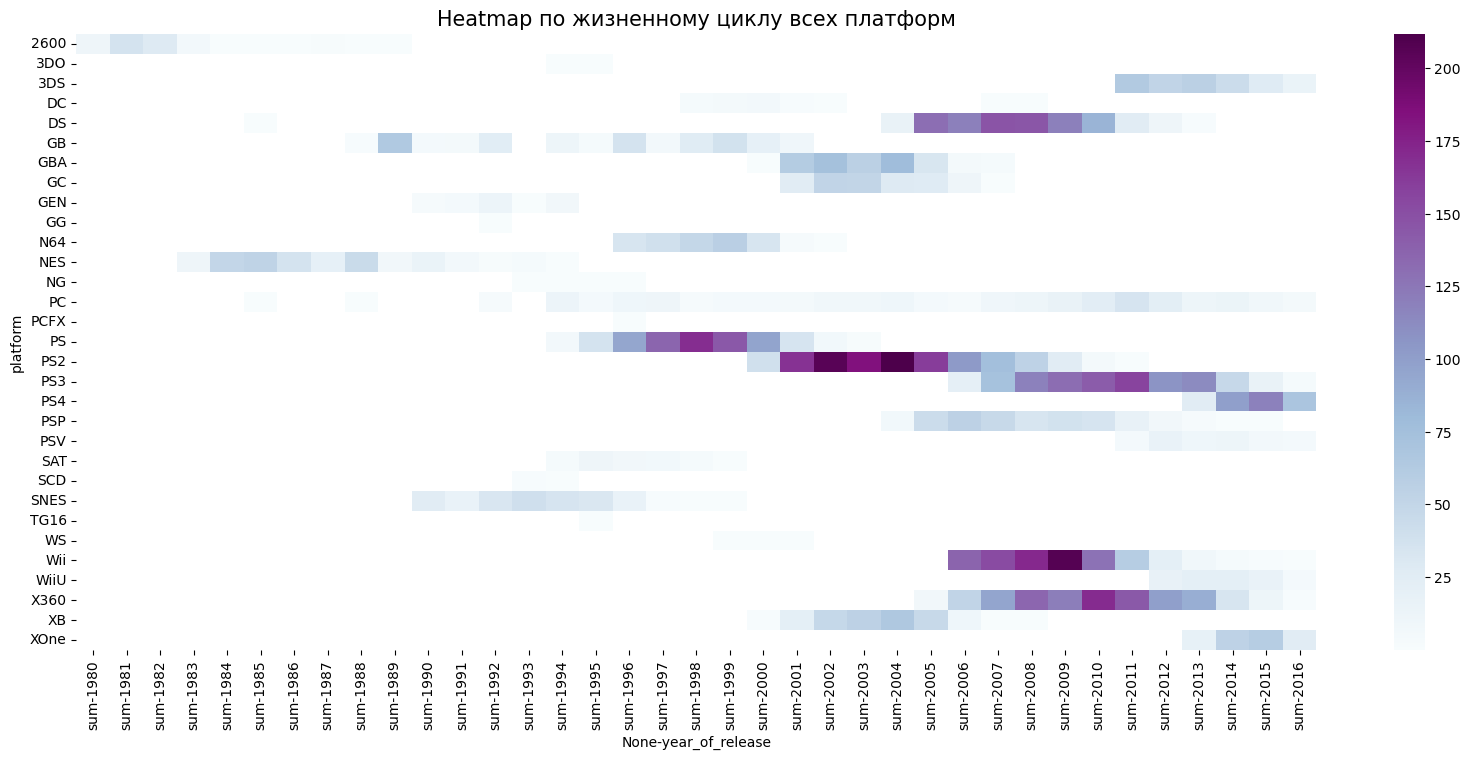

In [48]:
plt.figure(figsize=(20,8))
plt.grid(color = 'yellow',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '--')    #  начертание
sns.heatmap(data.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc=['sum']), cmap="BuPu")
plt.title('Heatmap по жизненному циклу всех платформ', fontsize=15)
plt.show()

In [49]:
def sale_platform_p(pl_name,df):
    pl = df[df['platform'] == pl_name]
    t = pd.pivot_table(pl, index=['year_of_release'], values='total_sales', aggfunc='sum')
    return t

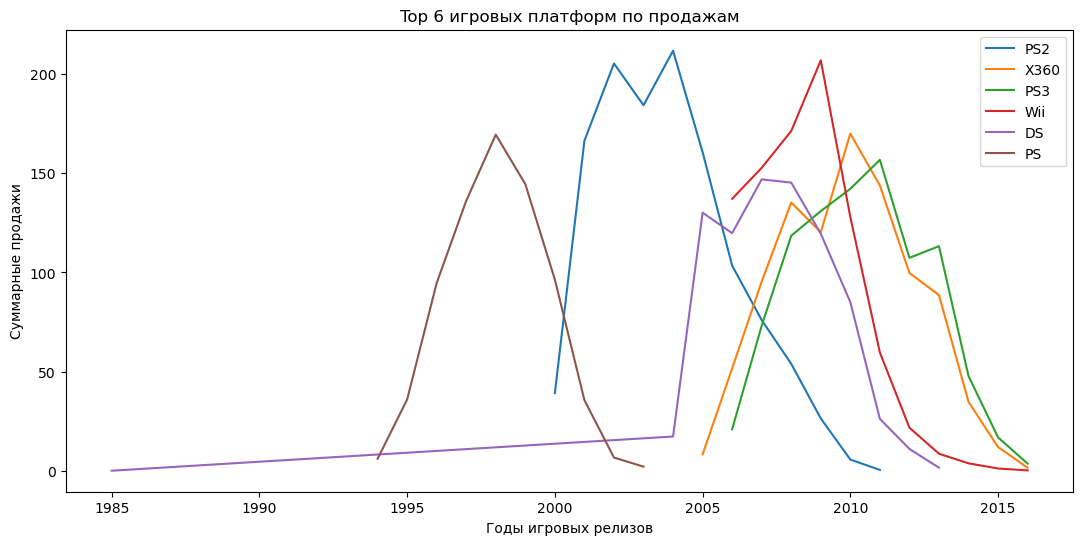

In [50]:
plt.figure(figsize=(13,6))
plt.title('Top 6 игровых платформ по продажам')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Суммарные продажи')
for i in top_platform_pivot:
    sns.lineplot(data=sale_platform_p(i,data)['total_sales'], label=i)
    plt.legend()             

#### Динамика продаж игр в наше время.

Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

На мой взгляд, актуальным периодом является период с 2012 года:
в этом периоде представлены данные по абсолютно всем самым популярным консолям, предыдущие года отбросим.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:
Какие платформы лидируют по продажам, растут или падают?

На основании полученных данных выберем несколько потенциально прибыльных платформ.

Перерисуем:

In [51]:
actual_data = data.query('year_of_release >= 2012').copy()
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_h,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,17+,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,17+,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,No_Rat,Нет оценки,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,No_Rat,Нет оценки,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,17+,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,No_Rat,Нет оценки,0.01


In [52]:
platform_pivot_act = actual_data.groupby('platform')['total_sales'].agg('sum')
platform_pivot_act = platform_pivot_act.sort_values(ascending=False)
top_platform_pivot_act = list(platform_pivot_act.index[:5])
top_platform_pivot_act

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [53]:
def sale_platform_actual(pl_name,df):
    pl = df[df['platform'] == pl_name]
    t = pd.pivot_table(pl, index=['year_of_release'], values='total_sales', aggfunc='sum')
    return t

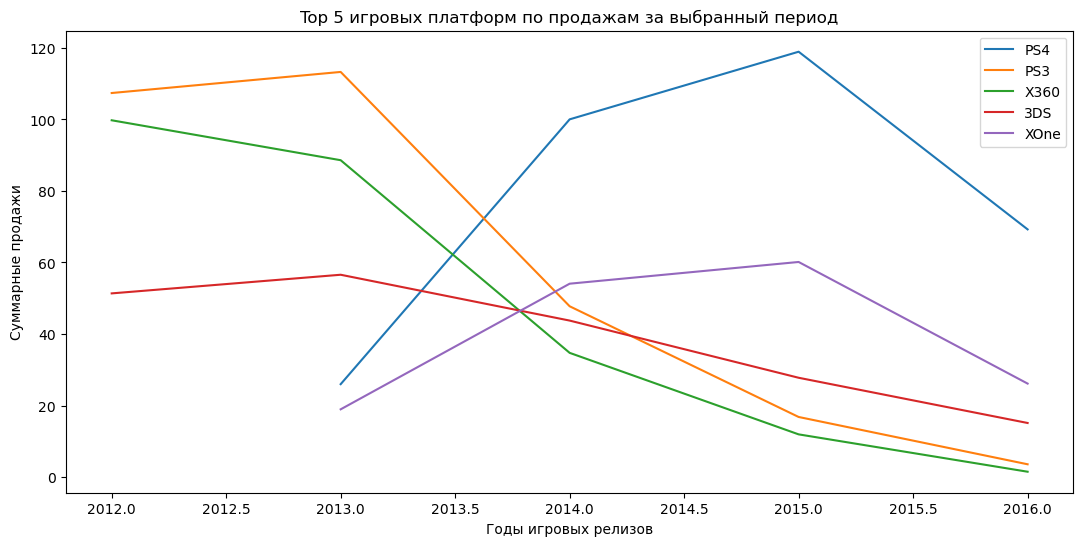

In [54]:
plt.figure(figsize=(13,6))
plt.title('Top 5 игровых платформ по продажам за выбранный период')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Суммарные продажи')
for i in top_platform_pivot_act:
    sns.lineplot(data=sale_platform_actual(i,actual_data)['total_sales'], label=i)
    plt.legend()   

In [55]:
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

Глянем ещё на другие платформы, которые вышли ближе к 2016 и глянем на рынок ПК:

In [56]:
other_platform = ['PC', 'PS4', 'XOne']

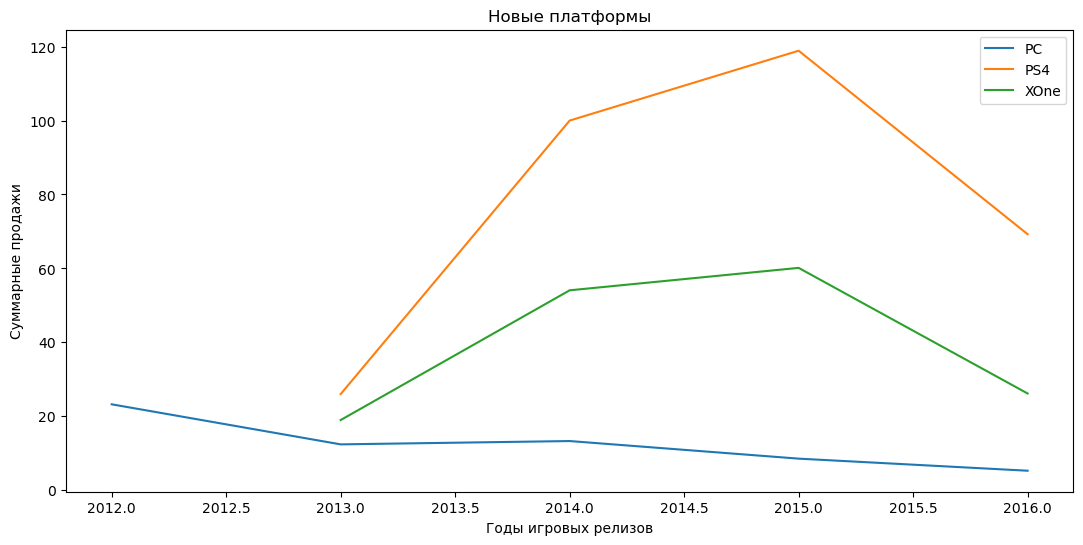

In [57]:
plt.figure(figsize=(13,6))
plt.title('Новые платформы')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Суммарные продажи')
for i in other_platform:
    sns.lineplot(data=sale_platform_actual(i,actual_data)['total_sales'], label=i)
    plt.legend() 

In [58]:
platform_pivot_act

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

На 6м и 7м по количеству проданных копий соответтвенно WiiU и PC. Можем добавить их на график тоже

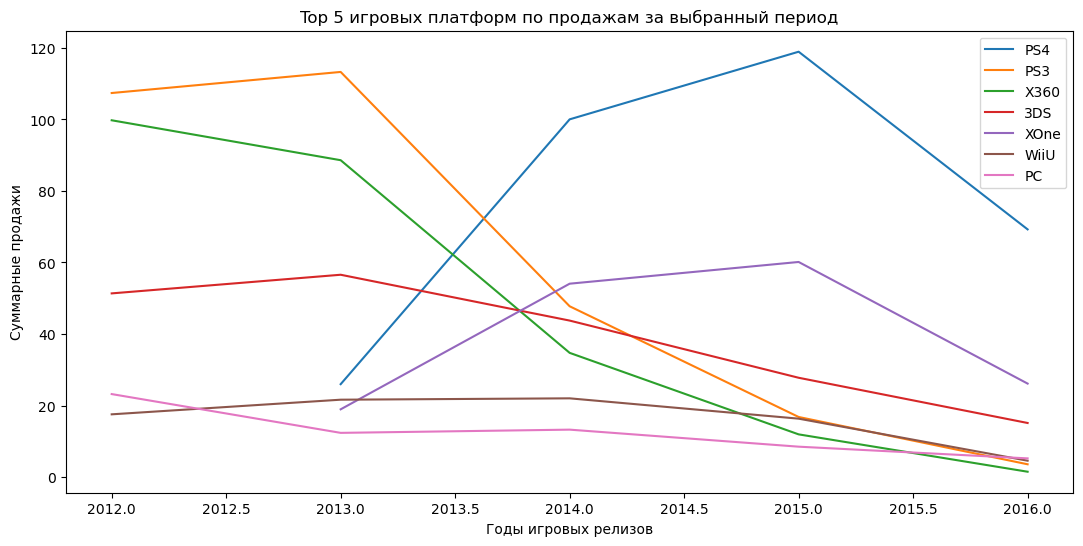

In [59]:
top_platform_pivot_act_pw = list(platform_pivot_act.index[:7])
plt.figure(figsize=(13,6))
plt.title('Top 5 игровых платформ по продажам за выбранный период')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Суммарные продажи')
for i in top_platform_pivot_act_pw:
    sns.lineplot(data=sale_platform_actual(i,actual_data)['total_sales'], label=i)
    plt.legend()

**Видим что суммарные продажи игр у PS4 и Xbox One уже начал расти, вспоминая что данные за 2016 могут быть неполными, не обращаю внимания на спад продаж. Рынок компьютерных игр особо в лидеры не выбивается, может на пространстве СНГ принято было играть в игры на ПК(пиратские), у остальных видна тенденция играть на специальных девайсайх для игр.** 

### Ответ на вопрос 2.

Для платформ, которые пользуются популярностью, срок использования равен 8-10 лет. Можно проследить, как менялись поколения для приствок PlayStation:

* PS 1994-2003
* PS2 2000-2011
* PS3 2006-2016
* PS4 2013-по сегодняшний день (сегодня - это где-то в 2016м или начало 2017)


Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.

### Подготовим данные для вопроса 3 и дадим ответ.


Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.
После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества.
Большинство студий разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года.
Хорошие игры на рынке продаются в течении нескольких лет.

Практически все игровые платформы в среднем существуют по 10 лет. 
- Cамые продаваемые это Sony Play Station и XBOX 
- Самый пик наступает примерно через 5 лет после выхода приставки
- у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал


Определим самые прибыльные платформы за актуальный период:

In [60]:
top_sales_platform = pd.pivot_table(actual_data, index=['platform'], values='total_sales', aggfunc='sum')
top_sales_platform.sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Топ 5 платформ по миру: PS4, PS3, X360, 3DS и XOne. 

Продажи растут у PS4, XOne, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, 3DS, Wii и PSP соотвественно.

In [61]:
actual_data['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

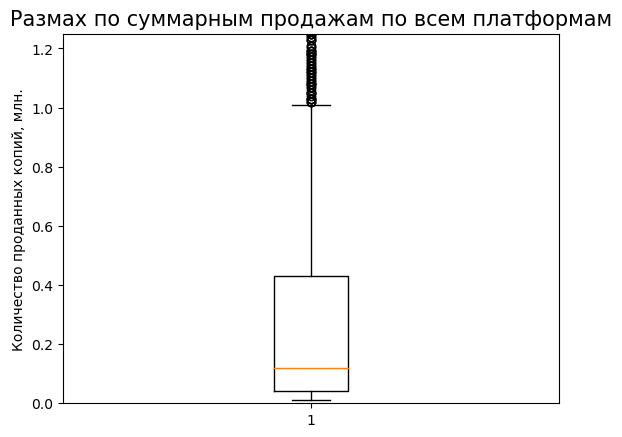

In [62]:
plt.boxplot(actual_data['total_sales'])
plt.ylim(0,1.25)
plt.ylabel('Количество проданных копий, млн.')
plt.title('Размах по суммарным продажам по всем платформам', fontsize=15);
plt.show()

В целом по всем платформам игра приносит до миллиона долларов, среднее значение около 480 тыс. дол. 

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

In [63]:
top_list = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
actual_data_top_list = actual_data[actual_data['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
actual_data_top_list['total_sales'].describe()

count    1820.000000
mean        0.655714
std         1.477562
min         0.010000
25%         0.060000
50%         0.190000
75%         0.630000
max        21.050000
Name: total_sales, dtype: float64

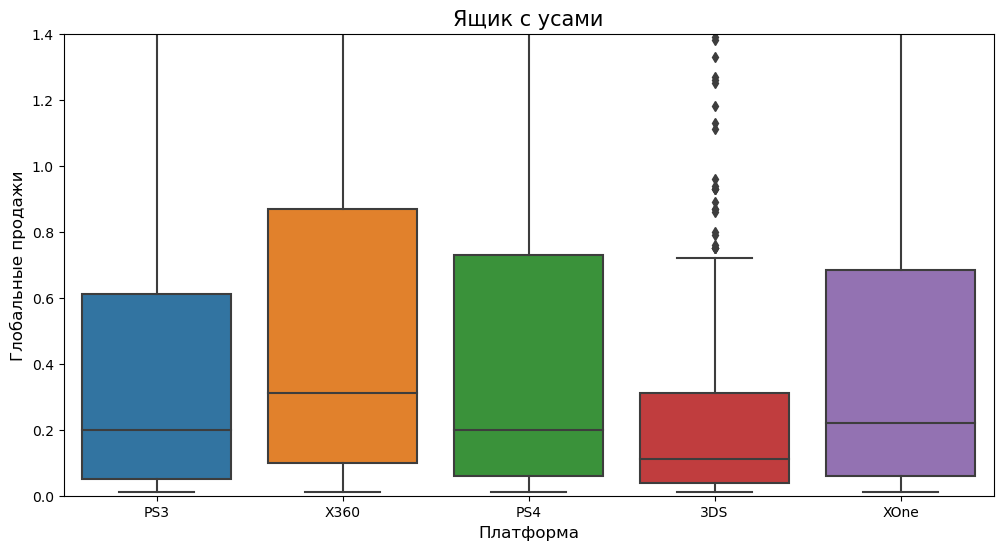

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_data_top_list, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,1.4)
plt.show()

Убираю ylim: Ящики мне удобнее описывать с одновременно выводом describe(), делал в одной строке, подменяя данные, при необходимости могу добавить все дескрайбы.

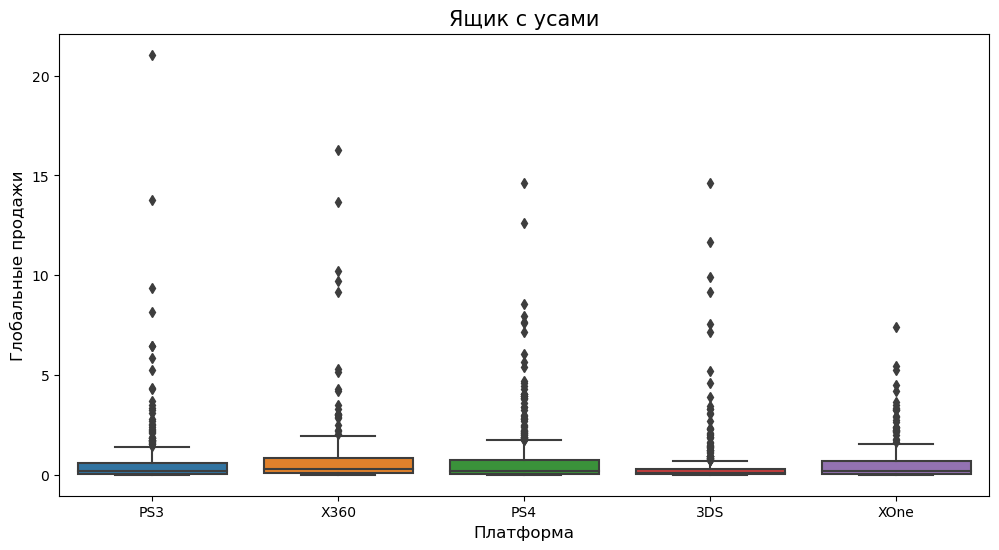

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_data_top_list, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Разница в продажах отличается. 



Период 2005-2016 год:

- Средние продажи игр по платформе PS3: 800 тыс. 3/4 всех копий составили не менее 730 тыс. шт. 
- Средние продажи игр по платформе X360: 810 тыс. 3/4 всех копий составили не менее 870 тыс. 
- Средние продажи игр по платформе PS4: 801 тыс. 3/4 всех копий составили не менее 730 тыс. 
- Средние продажи игр по платформе 3DS: 491 тыс. 3/4 всех копий составили не менее 313 тыс. 
- Средние продажи игр по платформе XOne: 647 тыс. 3/4 всех копий составили не менее 685 тыс.


**Посмотрим на корреляцию оценок и продаж топовой платформы и остальных:**

In [66]:
x = actual_data_top_list[actual_data_top_list['platform']=='XOne']
x['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

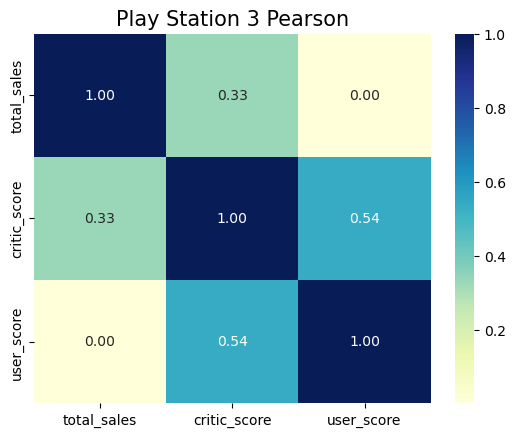

In [67]:
play_station_3 = actual_data.query('platform=="PS3" and critic_score != -1 and user_score != -1')
play_station_3_cor = play_station_3.loc[:,['total_sales', 'critic_score', 'user_score']]
sns.heatmap(play_station_3_cor.corr(),annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Play Station 3 Pearson', fontsize=15)
plt.show()

Убрав неизвестные значения рейтингов, видим что в целом картина стала значительно понятнее. Стало еще очевидней связь между продажами и оценками критиков и вообще никакой корреляции между оценкой игрока и продажами. Также видна зависимость оценки пользователей от оценки критиков.

Линейная корреляция Пирсона говорит о небольшой связи оценки критиков и суммарными продажами, но зависимость оценки пользователей от общей выручки ещё меньшая. Можно говорить о бОльшей зависимости оценки пользователей от оценки критиков: чем выше оценка критиков, тем будет выше оценка у юзеров. 


**Есть способ проверки корреляции, который проверят нелинейную зависимость, посмотрим что скажет он:**

In [68]:
! pip install phik

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 663.5/663.5 kB 4.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [69]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [70]:
phik_overview = play_station_3_cor.phik_matrix()

interval columns not set, guessing: ['total_sales', 'critic_score', 'user_score']


In [71]:
phik_overview

,total_sales,critic_score,user_score
total_sales,1.000000,0.21295,0.653538
critic_score,0.212950,1.00000,0.696790
user_score,0.653538,0.69679,1.000000


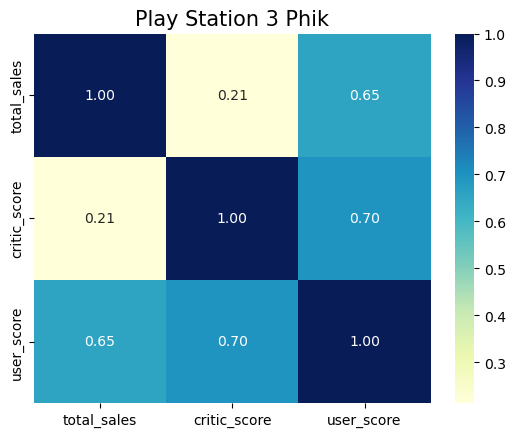

In [72]:
sns.heatmap(phik_overview,annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Play Station 3 Phik', fontsize=15)
plt.show()

А вот нелинейная корреляция по правильным данным показывает что-то непонятное, не буду её использовать дальше. Достаточно определяется корреляцией Пирсона и графиком рассеивания.

Также видим бОльшую **нелинейную** корреляцию оценки критиков и выручки, чем оценки пользователей и выручки. И опять видим что оценка пользователей и критиков взаимосвязаны больше всего. Можем для наглядности визуализировать, увидим заодно замененные на "-1" пропуски в оценках:

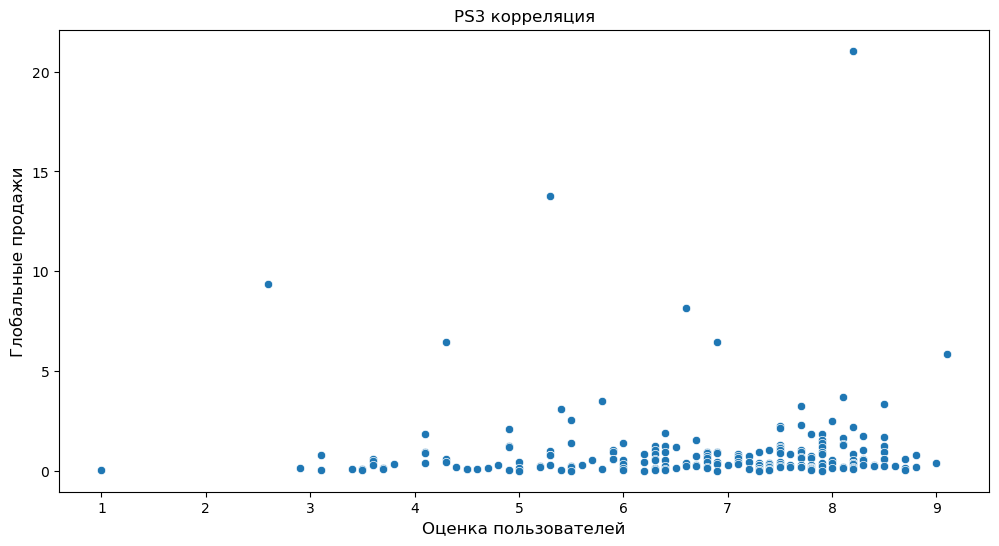

In [73]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=play_station_3)
plt.title('PS3 корреляция')
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

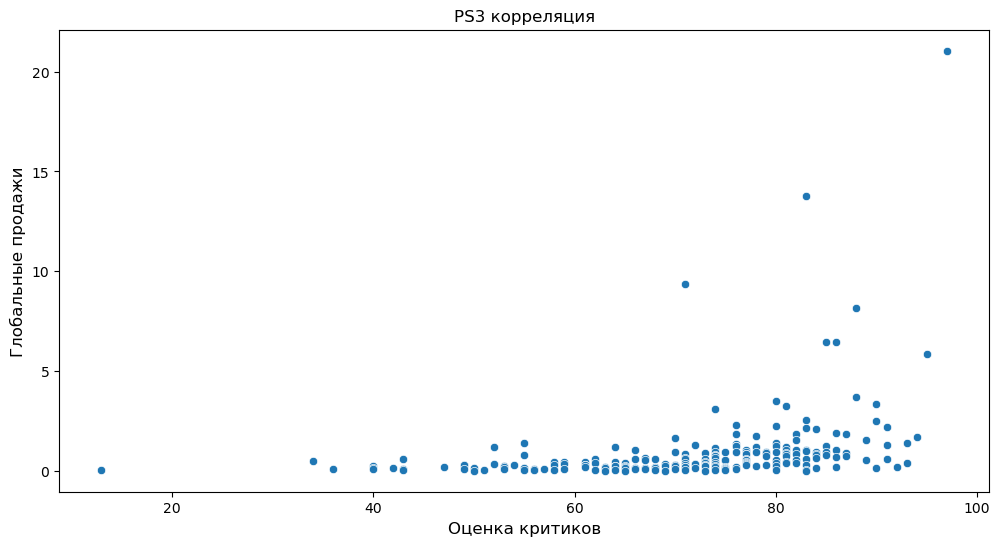

In [74]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=play_station_3)
plt.title('PS3 корреляция')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

Аналогично посмотрим на оставшиеся платформы PS4, X360, 3DS, XOne

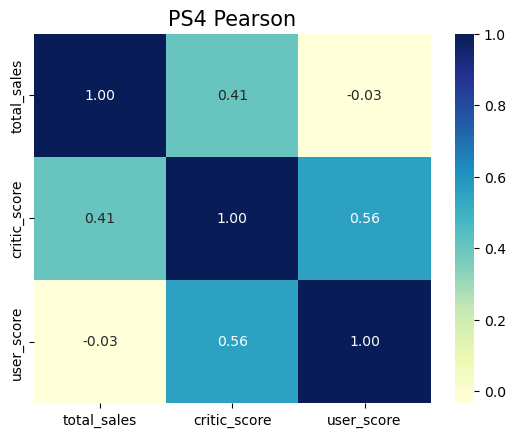

In [75]:
P_S_4 = actual_data.query('platform=="PS4" and critic_score != -1 and user_score != -1')
P_S_4_cor = P_S_4.loc[:,['total_sales', 'critic_score', 'user_score']]
sns.heatmap(P_S_4_cor.corr(),annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('PS4 Pearson', fontsize=15)
plt.show()

interval columns not set, guessing: ['total_sales', 'critic_score', 'user_score']


Text(0.5, 1.0, 'PS4 Phik')

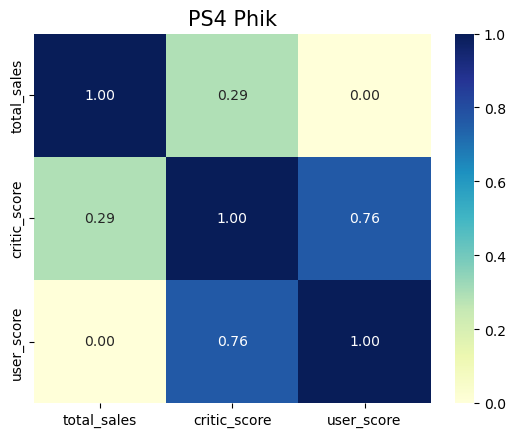

In [76]:
phik_overview = P_S_4_cor.phik_matrix()
sns.heatmap(phik_overview,annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('PS4 Phik', fontsize=15)

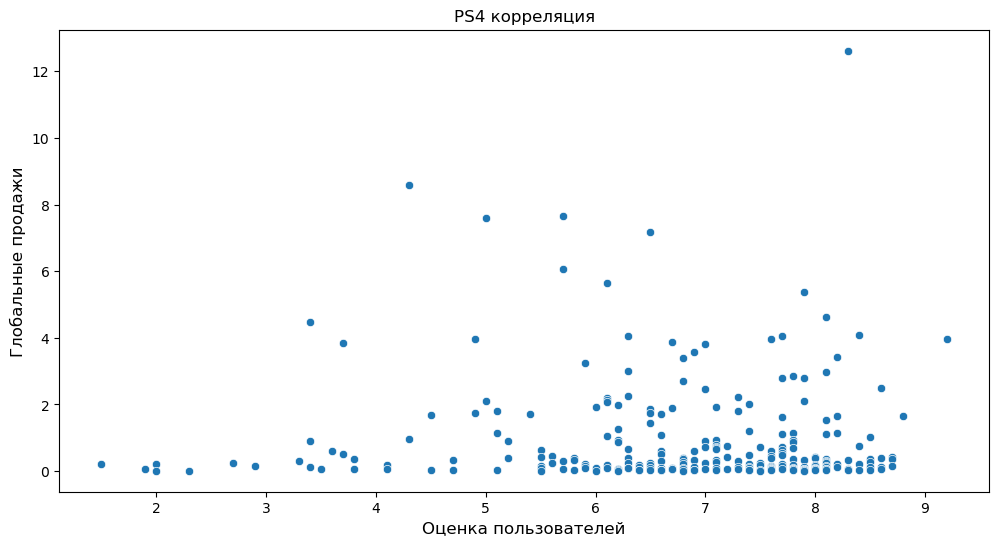

In [77]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=P_S_4)
plt.title('PS4 корреляция')
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

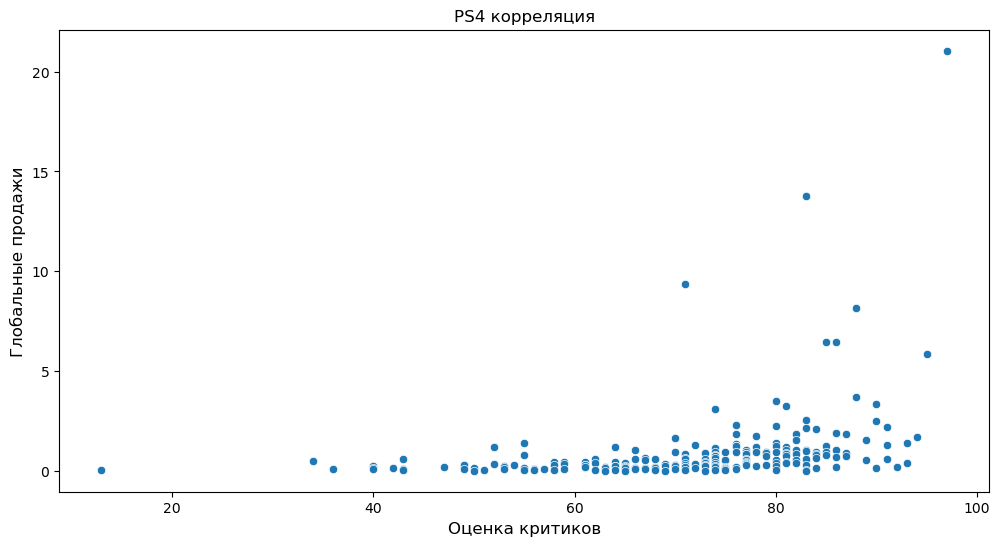

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=play_station_3)
plt.title('PS4 корреляция')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

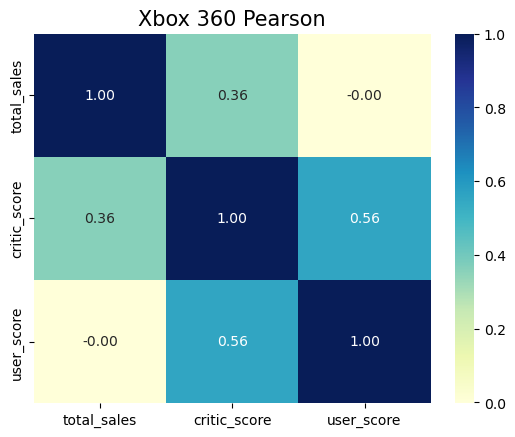

In [79]:
X_360 = actual_data.query('platform=="X360" and critic_score != -1 and user_score != -1')
X_360_cor = X_360.loc[:,['total_sales', 'critic_score', 'user_score']]
sns.heatmap(X_360_cor.corr(),annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Xbox 360 Pearson', fontsize=15)
plt.show()

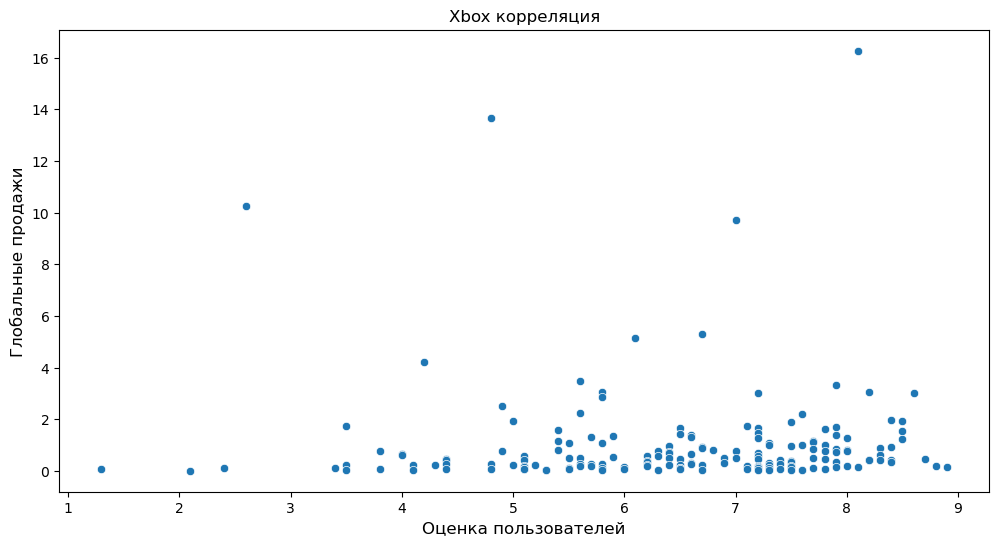

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=X_360)
plt.title('Xbox корреляция')
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

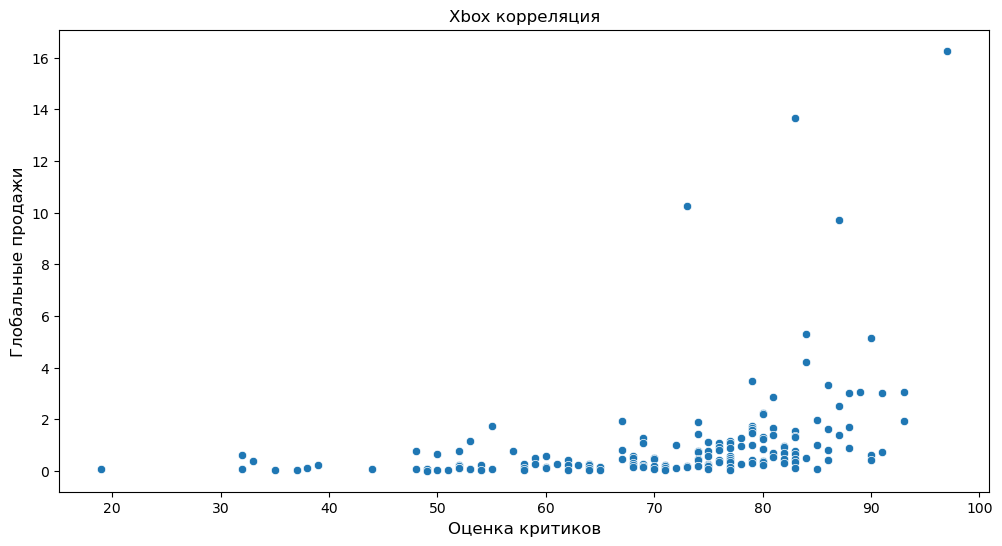

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=X_360)
plt.title('Xbox корреляция')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

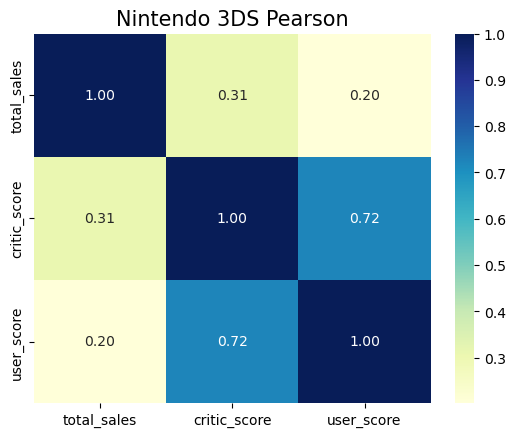

In [82]:
n_ds = actual_data.query('platform=="3DS" and critic_score != -1 and user_score != -1')
n_ds_cor = n_ds.loc[:,['total_sales', 'critic_score', 'user_score']]
sns.heatmap(n_ds_cor.corr(),annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Nintendo 3DS Pearson', fontsize=15)
plt.show()

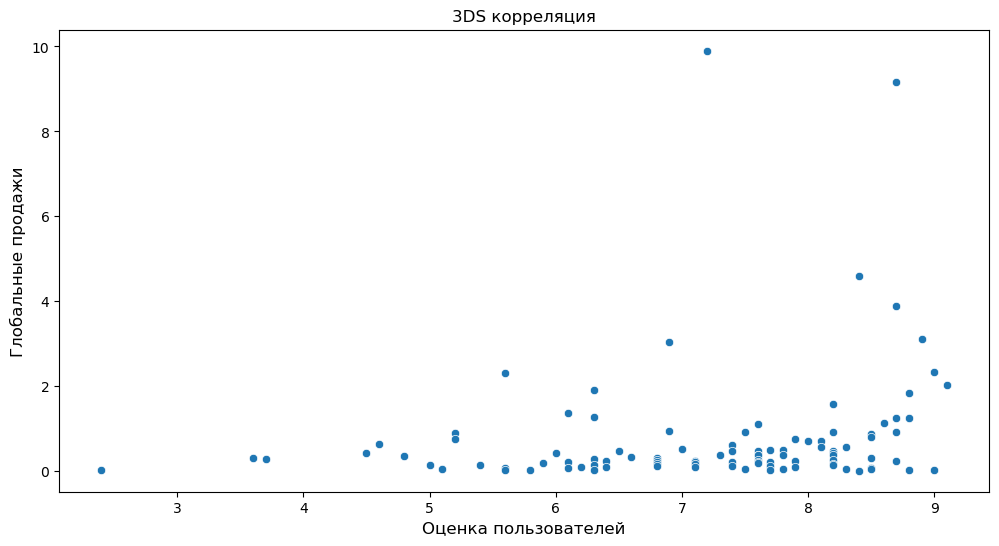

In [83]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=n_ds)
plt.title('3DS корреляция')
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

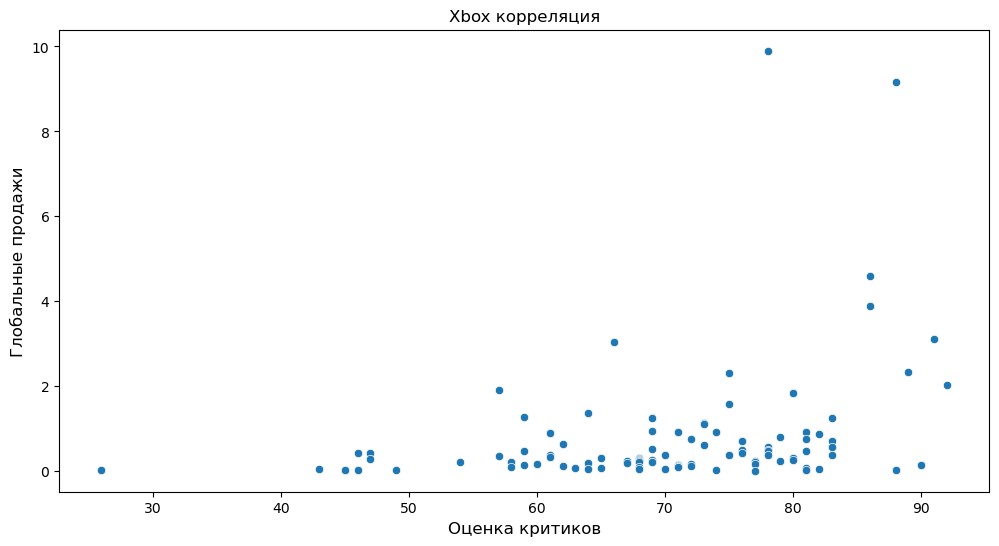

In [84]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=n_ds)
plt.title('Xbox корреляция')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

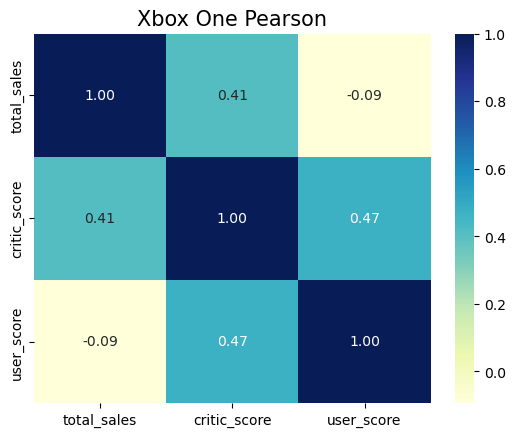

In [85]:
xone = actual_data.query('platform=="XOne" and critic_score != -1 and user_score != -1')
xone_cor = xone.loc[:,['total_sales', 'critic_score', 'user_score']]
sns.heatmap(xone_cor.corr(),annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Xbox One Pearson', fontsize=15)
plt.show()

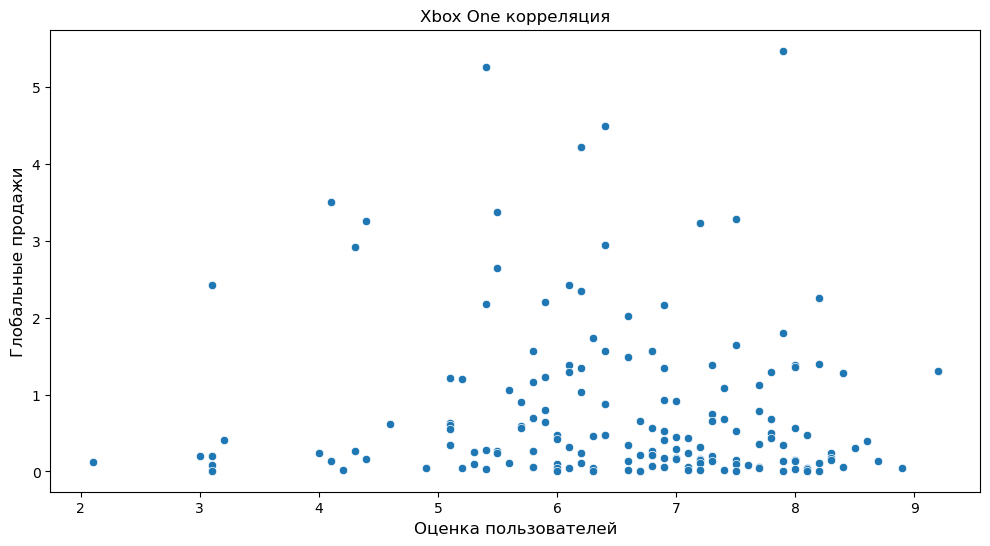

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=xone)
plt.title('Xbox One корреляция')
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

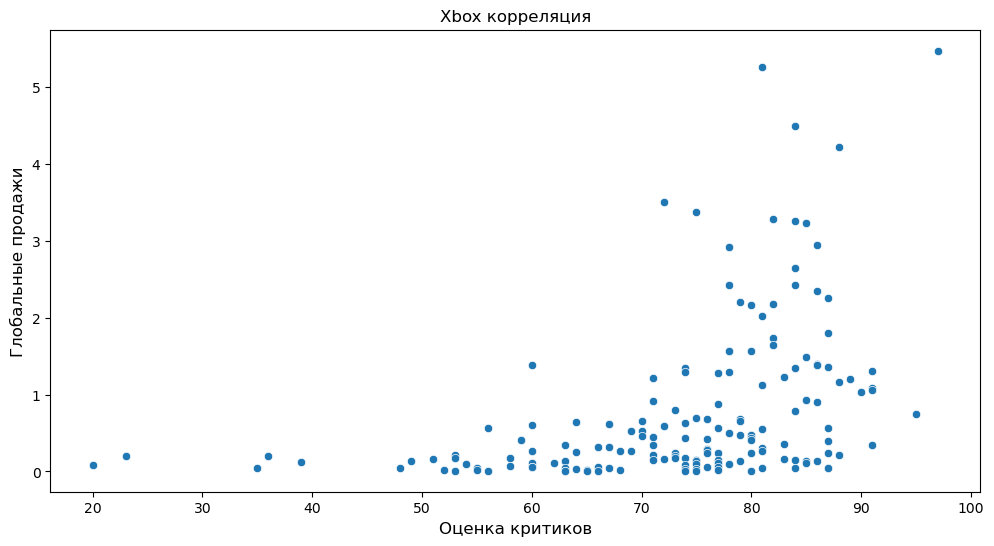

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone)
plt.title('Xbox корреляция')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

#### Вывод по корреляциям

Тенденции схожи с PS3 у всех платформ из списка, немного можно выделить DS, где степень связи между критиками и пользователями в отношении общих продаж схожи и у этой платформы наименьшая корреляция. Может на ДС игр меньше или они в целом качественнее и больше нравятся геймерам.
Практически у всех платформ присутствует незначительная корреляция, между оценками пользователей и критиков к продажам.
Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей. А пользователи, с свою очередь при высокой оценке критиков, также часто ставят высокую оценку, можно говорить что критики воздействуют на геймеров. 



**Распределение по жанрам:**

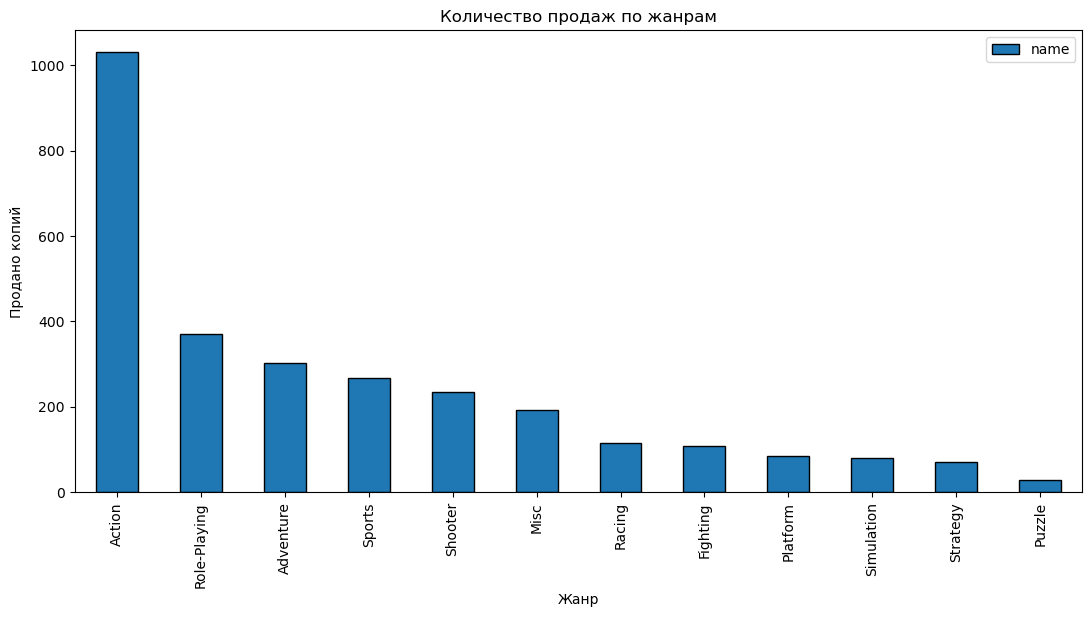

In [88]:
pivot_count = actual_data.groupby('genre').agg({'name': 'count'}).sort_values(by='name', ascending=False)
pivot_count.plot(kind='bar', figsize = (13,6), ec='black',
                           title='Количество продаж по жанрам',
                           xlabel='Жанр', ylabel = 'Продано копий');

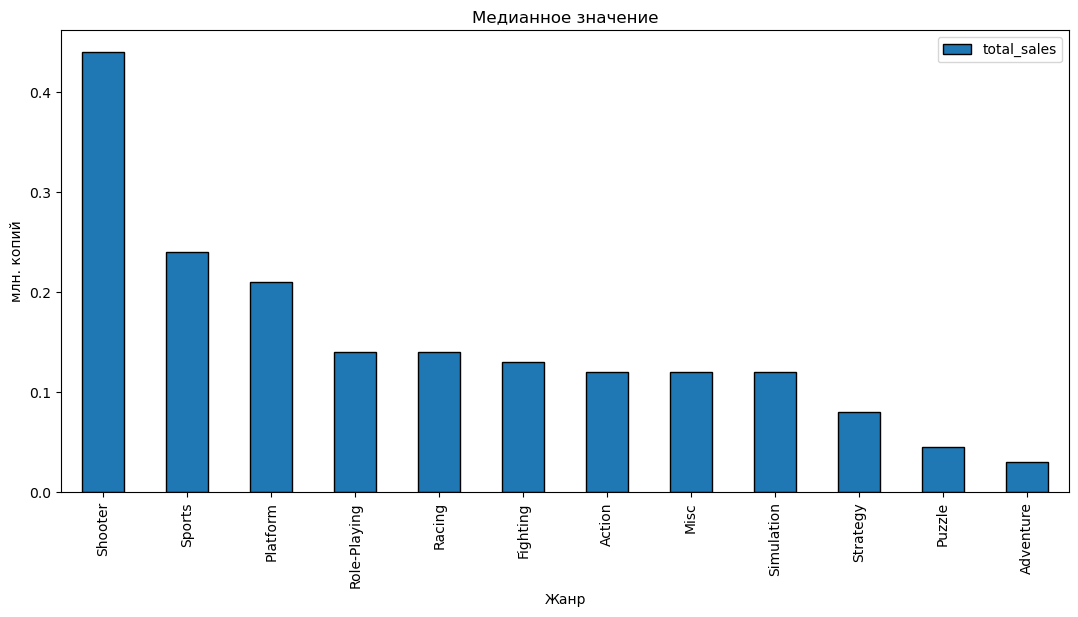

In [89]:
pivot_median = actual_data.groupby('genre').agg({'total_sales': 'median'}).sort_values(by='total_sales', ascending=False)
pivot_median.plot(kind='bar', figsize = (13,6), ec='black',
                           title='Медианное значение',
                           xlabel='Жанр', ylabel = 'млн. копий');

Самыми прибыльными жанрами можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).

Популярность экшена обусловлена историей создания игр и желания людей проверить свои навыки ловкости и реакции. Сюда также можно отнести Misc.

Популярность шутеров, спортивых игр и ролевых игр обусловлена тем, что в большинстве из них играют несколько игроков одновременно. 

Ролевые игры затягивают игроков своей сложностью к прохождению игры и соответсвенно в нее играют часто и даже перепроходят много раз, что увеличивает интерес к будущим дополнениям или повышают вероятность рассказа об этой игре друзьям.

На период 2012-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

Головоломки были популярны с 80х годов, и глядя на рынок мобильных игр понятно куда они ушли, и там они себя чувствуют лучше чем где-угодно.

Симуляторы - это повторение реальной жизни или аспектов реальной жизни сейчас, в прошлом или в будущем. Этот жанр на любителя делать так, как ему хочется.

Стратегии хорошо играются с мышью, а вот с контроллером нужно несмотря на сложности в игре привыкать к управлению.

Также стоит не забывать о стоимости разработки игр и соответственно их конечной стоимости, пазл может и школьник на коленке написать за гематогенку, а Half-Life 3 так и не сделали.

### Вывод по шагу 3
Были даны ответы на все поставленые вопросы и рассуждения подкреплены обоснованиями.

Обобщенный вывод на 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как уже многие студии-разработчики нашли применения своих техологий на этих платформах и хотят попасть на все рынки.


### Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Напишем функцию рисования барплотов по заданным вопросам:**

In [90]:
def region_plot(group, p_sales, ax):
    pivot = actual_data.groupby(group).agg({p_sales: 'sum'}).sort_values(by=p_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    color_dict = {'na_sales': 'None', 'eu_sales': 'gray', 'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[p_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[p_sales], rot=45)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

**Определение популярных консолей**

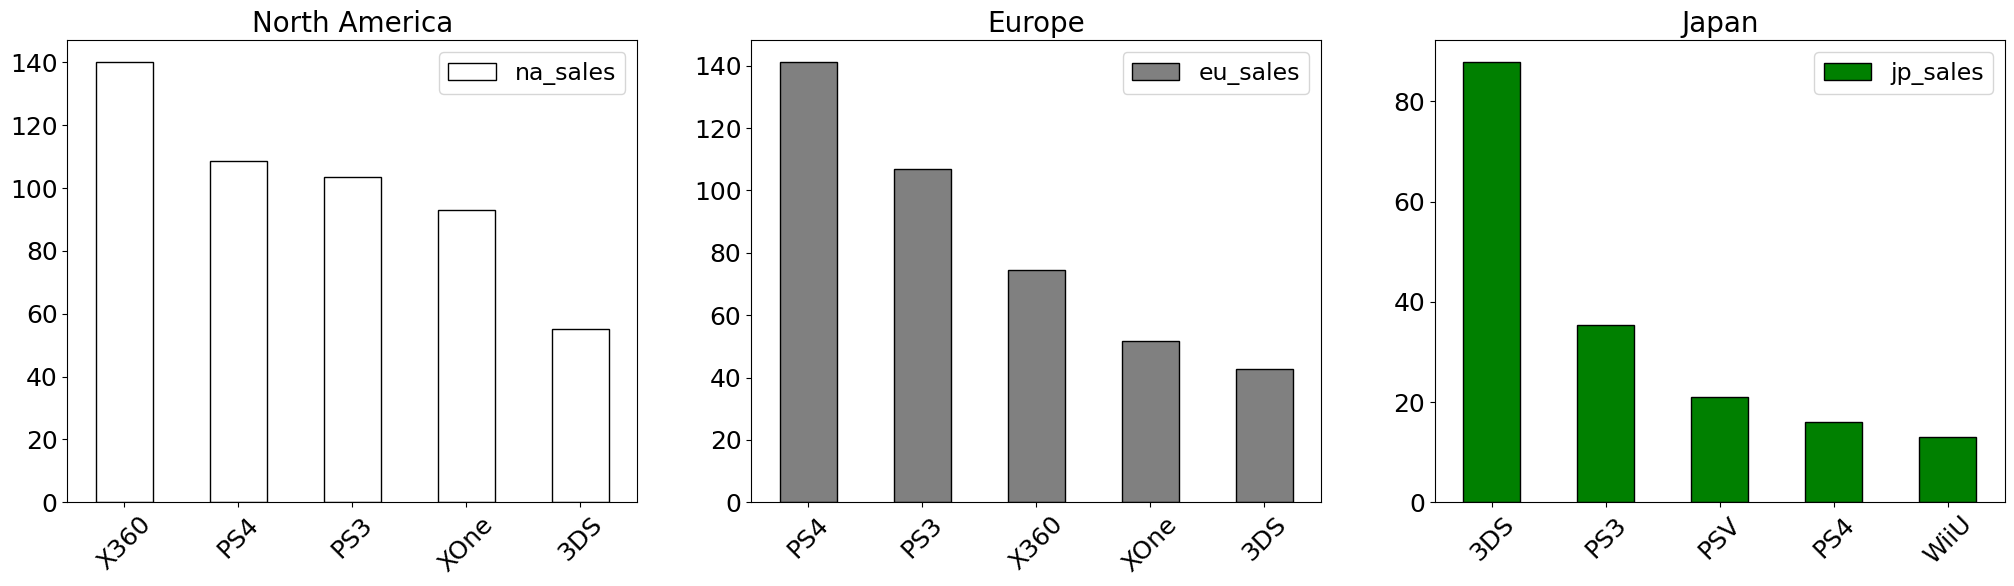

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
region_plot('platform', 'na_sales', 0)
region_plot('platform', 'eu_sales', 1)
region_plot('platform', 'jp_sales', 2)

В Северной Америке за выбранный период (несмотря на то что я его выбрал довольно большим) лидируют Xbox360 и Nintendo Wii, PS2 ушла на покой, что и логично, когда уже PS4 начинает внедряться.

В Европе PS3 признали больше и уже начинают осваивать PS4, Xbox360 второй по прибыльности. 

Если пока не смотреть на японию, то про Nintendo Wii можно говорить о казуальности этой платформы и доступности поиграть всей семьей.

А если смотреть на Японию, тут как всегда все наоборот. Лидер - исключительно японский DS.


**Определение популярных жанров**

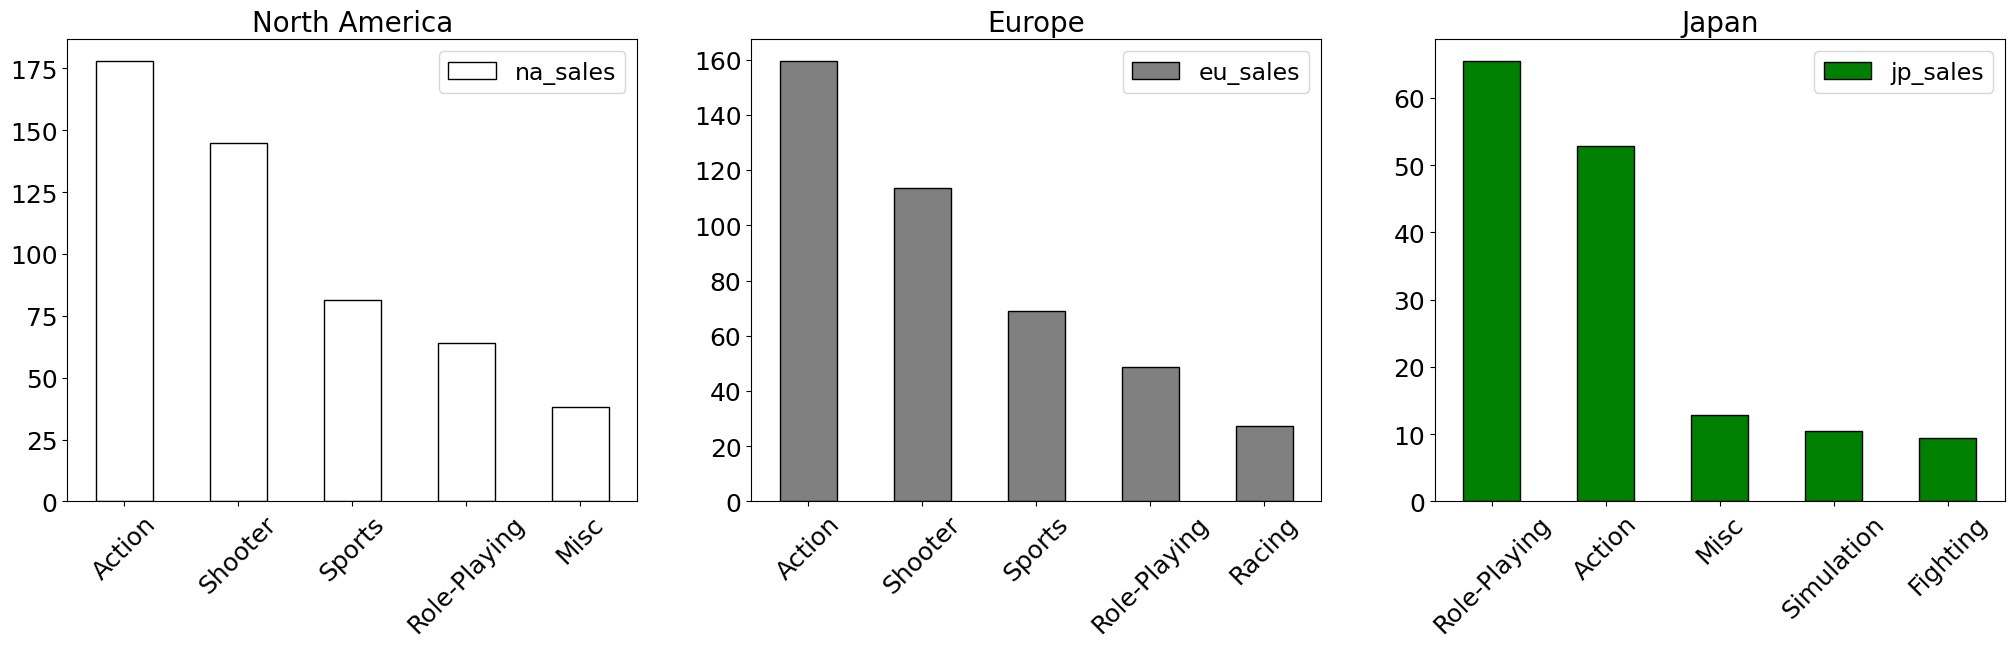

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
region_plot('genre', 'na_sales', 0)
region_plot('genre', 'eu_sales', 1)
region_plot('genre', 'jp_sales', 2)

В Европе и Северной Америке вкусы схожи, там много любителей игр жанра экшн, спортивных и шутеров, в Европе еще играют в гонки, в Северной Америке в РПГ.

Япония опять выделяется, у них даже Action игры это не то, что мы представляем, им нужно погружение и много часов геймплея.

Везде присутствуют игры жанра Misc, игры в которых важна ловкость и реакция игрока, т.е. игра бросает тебе челлендж, типа смоги пройти, можно говорить что это нравится какой-то отдельной группе людей в каждом регионе. 


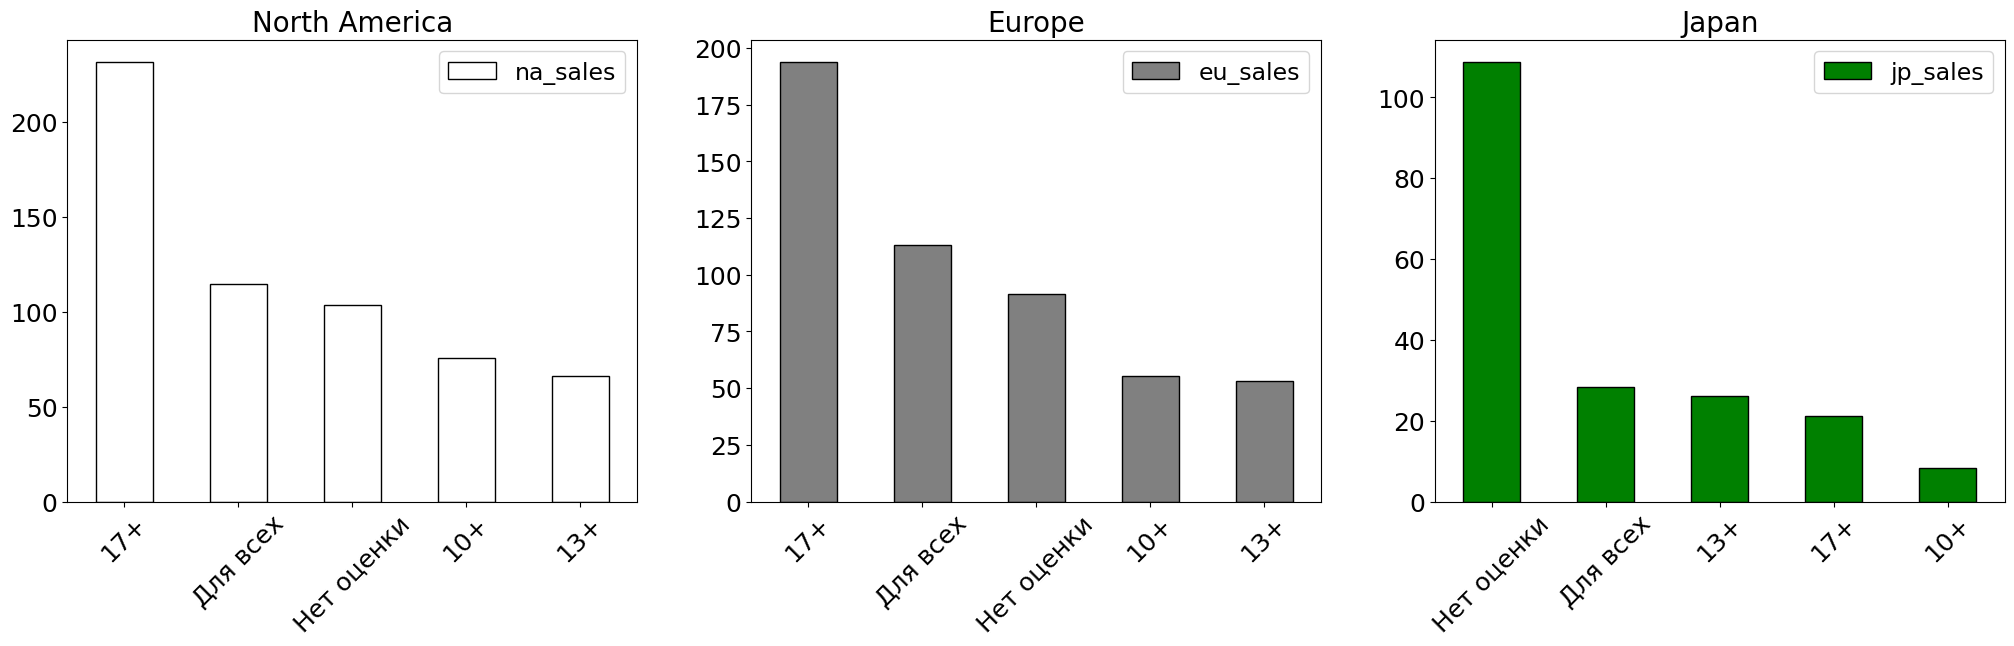

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
region_plot('rating_h', 'na_sales', 0)
region_plot('rating_h', 'eu_sales', 1)
region_plot('rating_h', 'jp_sales', 2)

Во всех регионах пользуются популярностью игры для всех возрастов. 
Отдельно можно опять поставить Европу с Северной Америкой против Японии, во-первых там часто не ставят оценку для игр, что затрудняет выводы, но  можно с точностью сказать, что игры для взрослой аудитории (17+) покупают хуже чем в Европе и Америке. Можно предположить что игры в Европе и Америке с рейтингом 17+ приносят больше доходов их и больше разрабатывают, в Японии хотят чтобы играло более молодое поколение. 

### Вывод по шагу 4.

**Проведя анализ по регионам можно составить портрет игрока.**

* Американский игрок - от 17 лет, любит играть или на X360, Wii или PS3, любит экшены и шутеры. 
* Европейский игрок - от 17 лет, любит играть на PS3, X360 любит экшены и шутеры. 
* Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или DS, любит тратить время на RPG и экшены.

### Шаг 5. Проверка гипотез


Гипотезы:

* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05


**Гипотеза № 1:**
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* H₀ (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H₁ (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Находим средние пользовательские рейтинги и проверяем гипотезу

In [94]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_h,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,17+,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,17+,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,No_Rat,Нет оценки,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,No_Rat,Нет оценки,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,17+,13.79


In [95]:
x_one_ratings = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc_ratings = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']
x_one_ratings.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [96]:
pc_ratings.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [97]:
result = st.ttest_ind(x_one_ratings, pc_ratings)
print(result)

Ttest_indResult(statistic=0.5930304646661255, pvalue=0.5535080500643661)


In [98]:
alpha = 0.05

results = st.ttest_ind(x_one_ratings, pc_ratings)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 3,7% можно получить различность рейтингов двух платформ.

**Гипотеза № 2:**
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевые гипотезы:

* Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [99]:
t_action = actual_data[(actual_data['genre']=='Action') & (actual_data['user_score'] > 0)]['user_score']
t_action.mean()

6.825047801147237

In [100]:
t_sports = actual_data[(actual_data['genre']=='Sports') & (actual_data['user_score'] > 0)]['user_score']
t_sports.mean()

5.455897435897437

In [101]:
alpha = .05

results = st.ttest_ind(t_action, t_sports)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод:** Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам. Или, другими словами вероятность, что средние рейтинги будут одинаковые по жанрам составляет 3.7163089460934874e-26

Вывод по проверке гипотез

Проверили гипотезы по ТЗ:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.



## Шаг 6. Общий вывод

В ходе проделанной работы было выполнено:

1. Просмотрена таблица, выявлены аномалии и пропущенные значения.
2. Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Проведен анализ по данным и подготовлены актуальные данные.
4. Составлены портреты пользователей для купных регионов продаж.
5. Выполнены проверки гипотез.

**По проведенному анализу:** самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей таким "влиянием" на выручку похвастаться не могут, тем более когда они зависят от оценки критиков.

**В целом по рынку игровой индустрии** хочу отметить, что сильно растет рынок мобильного гейминга и казуалок. Технологии развиваются, но людям все меньше хочется идти на запад в Morrowind, надеясь наткуться на нужную деревню, а бежать по стрелке вверху экрана и нажимать прыжок/огонь.

Все равно не стоит упускать факты того, кто игру создал, на какой платформе и какого она жанра:

1. Триллионы проданных копий в датасете, а основных команий всего 3: Microsoft, Sony, Nintendo. Стоит брать во внимание приверженность юзеров к платформе.
2. Платформа определяет технические возможности разработчиков. Лучше платформа (в плане CPU, GPU, RAM) скорее всего лучше и игра. Также, например в Японии, где ситуация, что тебе до школы/работы надо ездить на удобном поезде 600км каждый день, мобильность - победа. Пока не пришли мобильные разработчики. PSP так и не смогла показать себя.
3. Жанр - это индивидуальная особенность каждого игрока, тут просто смотрим во что играют люди и пишем им похожее.

**Сводный анализ для кампании на 2017 год:**
1. Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne.
2. Закупать игры популярных жанров - экшен, шутеры и спортивные игры.
3. Следить за своей аудиторией. Игры доступные для всех возрастов имеют очнень большую аудиторию по всей планете, но в игры 17+ играет платежеспособная аудитория и это важно учитывать, тем более что в этом рейтинге тоже много игроков.  
4. PC с ростом технологий и доступности также нельзя выпускать из виду, появляются порты с других платформ, кто-то хочет поиграть в God Of War, но не хочет покупать PlayStation.


